# MNIST CNN
## Following and building upon tutorial: https://keras.io/examples/vision/mnist_convnet/

- <b>1. Import Libraries
- <b>2. Import Data
- <b>3. Process Data</b>
    - 3.1 Normalise Data
    - 3.2 Explore Data
    - 3.3 Encode Target Variable
- <b>4. Build Model
- <b>5. Train Model
- <b>6. Evaluate Model </b>
    - 6.1 Confusion Matrix
    - 6.2 ROC

## 1. Import Libraries

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Import Data

In [ ]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()  # Import data

## 3. Process Data

### 3.1 Normalise Data

In [ ]:
X_train = X_train.astype("float32")/255   # Scale image values between 0 and 1
X_test = X_test.astype("float32")/255   # Scale image values between 0 and 1

In [ ]:
X_train = np.expand_dims(X_train, -1)  # Shape the data 
X_test = np.expand_dims(X_test, -1)  # Shape the data

### 3.2 Explore Data

In [ ]:
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### 3.3 Encode Target Variable

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## 4. Build Model

In [ ]:
inputshape = (28,28,1)
model = keras.Sequential(
        [keras.Input(shape = inputshape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

## 5. Train Model

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 22s 53ms/step - loss: 0.3621 - accuracy: 0.8901 - val_loss: 0.0815 - val_accuracy: 0.9775
Epoch 2/15
422/422 [==============================] - 22s 53ms/step - loss: 0.1093 - accuracy: 0.9667 - val_loss: 0.0585 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 25s 60ms/step - loss: 0.0821 - accuracy: 0.9748 - val_loss: 0.0463 - val_accuracy: 0.9875
Epoch 4/15
422/422 [==============================] - 24s 56ms/step - loss: 0.0692 - accuracy: 0.9780 - val_loss: 0.0395 - val_accuracy: 0.9890
Epoch 5/15
422/422 [==============================] - 24s 57ms/step - loss: 0.0609 - accuracy: 0.9818 - val_loss: 0.0384 - val_accuracy: 0.9895
Epoch 6/15
422/422 [==============================] - 26s 61ms/step - loss: 0.0536 - accuracy: 0.9832 - val_loss: 0.0372 - val_accuracy: 0.9897
Epoch 7/15
422/422 [==============================] - 26s 61ms/step - loss: 0.0520 - accuracy: 0.9837 - val_loss: 0.0378 - val_accuracy:

## 6. Evaluate Model

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)    # verbose (0, 1 or 2) changes training display

313/313 [==============================] - 2s 5ms/step - loss: 0.0246 - accuracy: 0.9920


In [ ]:
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02463727816939354
Test accuracy: 0.9919999837875366


### 6.1 Confusion Matrix
#### Confusion matrices can aid in identifying classification model weaknesses

In [ ]:
predictions = model.predict(X_test, verbose=1)  # Get predictions

313/313 [==============================] - 2s 5ms/step


In [ ]:
predicted_classes = np.argmax(predictions, axis=1)   # Convert into classes labels (i.e. 1/2/3...)
y_test_classes = np.argmax(y_test, axis=1)   # Convert into classes labels (i.e. 1/2/3...)

In [ ]:
confusion = confusion_matrix(y_test_classes, predicted_classes)    # Create confusion matrix

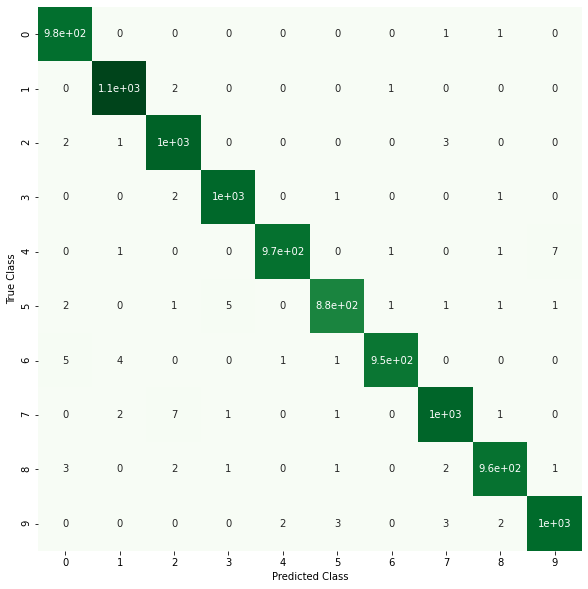

In [ ]:
# Plot confusion matrix
fig = plt.figure(figsize=(10,10))

sns.heatmap(confusion,annot=True,cbar=False,square=True,cmap=plt.cm.Greens)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

<i> Confusion matrix shows that numbers that get confused the most are [2,7] and [4,9], closely followed by [0,6] and [3,5]. Althought there are very few cases where this occurs, the ability to differentiate between these pairs of numbers should be enhanced to increase models performance.</i>

### 6.2 ROC (Receiver Operating Characteristic)
#### We can us a 'OneVsAll' method to analyse multi-classification models performance

In [7]:
list1 = ['Yes','No']

for i,x in enumerate(list1):
  if i == 0:
    print(x)
  else:
    pass

Yes
